In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('../DATA/cancer_classification.csv')

## Exploratory Data Analysis

In [5]:
# check if there is any null data 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [7]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
mean radius,569.0,14.127292,3.524049,6.981000,11.700000,13.370000,15.780000,28.11000
mean texture,569.0,19.289649,4.301036,9.710000,16.170000,18.840000,21.800000,39.28000
mean perimeter,569.0,91.969033,24.298981,43.790000,75.170000,86.240000,104.100000,188.50000
mean area,569.0,654.889104,351.914129,143.500000,420.300000,551.100000,782.700000,2501.00000
mean smoothness,569.0,0.096360,0.014064,0.052630,0.086370,0.095870,0.105300,0.16340
mean compactness,569.0,0.104341,0.052813,0.019380,0.064920,0.092630,0.130400,0.34540
mean concavity,569.0,0.088799,0.079720,0.000000,0.029560,0.061540,0.130700,0.42680
mean concave points,569.0,0.048919,0.038803,0.000000,0.020310,0.033500,0.074000,0.20120
mean symmetry,569.0,0.181162,0.027414,0.106000,0.161900,0.179200,0.195700,0.30400
mean fractal dimension,569.0,0.062798,0.007060,0.049960,0.057700,0.061540,0.066120,0.09744


<AxesSubplot:xlabel='benign_0__mal_1', ylabel='count'>

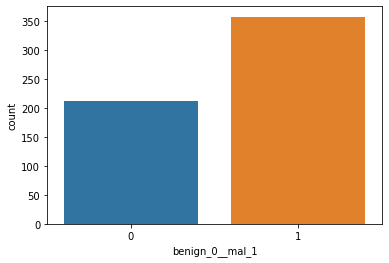

In [8]:
sns.countplot(x='benign_0__mal_1', data=df)

<AxesSubplot:>

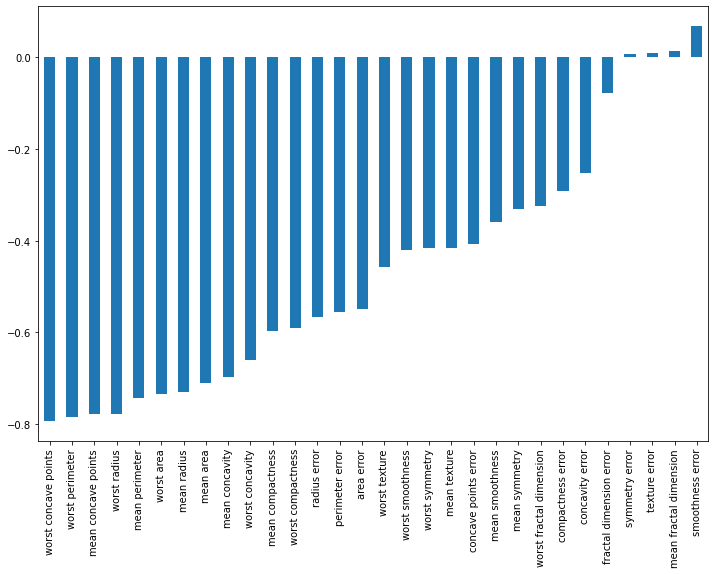

In [14]:
plt.figure(figsize=(12,8))
df.corr()['benign_0__mal_1'][:-1].sort_values().plot(kind='bar')

<AxesSubplot:>

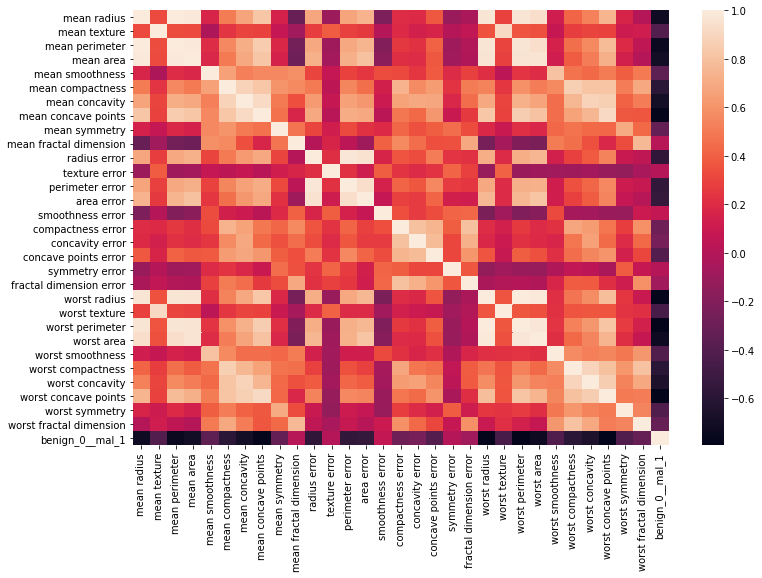

In [16]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr())

## Scaling / Train Test Split

In [19]:
X = df.drop('benign_0__mal_1', axis=1).values
y = df['benign_0__mal_1'].values

In [20]:
from sklearn.model_selection import train_test_split

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=101)

In [22]:
from sklearn.preprocessing import MinMaxScaler

In [23]:
scaler = MinMaxScaler()

In [24]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## Creating Model

In [25]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation

In [26]:
X_train.shape

(426, 30)

In [27]:
model = Sequential()

model.add(Dense(30, activation='relu'))

model.add(Dense(15, activation='relu'))

# Binary Classification
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy')

In [28]:
model.fit(x=X_train, y=y_train, epochs=600, validation_data=(X_test, y_test))

Epoch 1/600
14/14 [==============================] - 3s 118ms/step - loss: 0.7043 - val_loss: 0.6654
Epoch 2/600
14/14 [==============================] - 0s 4ms/step - loss: 0.6522 - val_loss: 0.6255
Epoch 3/600
14/14 [==============================] - 0s 7ms/step - loss: 0.6150 - val_loss: 0.5844
Epoch 4/600
14/14 [==============================] - 0s 5ms/step - loss: 0.5752 - val_loss: 0.5316
Epoch 5/600
14/14 [==============================] - 0s 5ms/step - loss: 0.5207 - val_loss: 0.4772
Epoch 6/600
14/14 [==============================] - 0s 4ms/step - loss: 0.4664 - val_loss: 0.4183
Epoch 7/600
14/14 [==============================] - 0s 5ms/step - loss: 0.4030 - val_loss: 0.3661
Epoch 8/600
14/14 [==============================] - 0s 4ms/step - loss: 0.3517 - val_loss: 0.3216
Epoch 9/600
14/14 [==============================] - 0s 4ms/step - loss: 0.3196 - val_loss: 0.2868
Epoch 10/600
14/14 [==============================] - 0s 4ms/step - loss: 0.2828 - val_loss: 0.2606
Epoch 1

In [29]:
losses = pd.DataFrame(model.history.history)

<AxesSubplot:>

<Figure size 864x576 with 0 Axes>

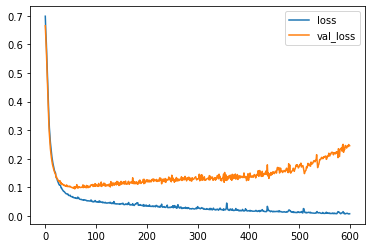

In [32]:
losses.plot()

## Early Stopping

In [33]:
model = Sequential()

model.add(Dense(30, activation='relu'))

model.add(Dense(15, activation='relu'))

# Binary Classification
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy')

In [34]:
from tensorflow.keras.callbacks import EarlyStopping

In [35]:
help(EarlyStopping)

Help on class EarlyStopping in module tensorflow.python.keras.callbacks:

class EarlyStopping(Callback)
 |  Stop training when a monitored metric has stopped improving.
 |  
 |  Assuming the goal of a training is to minimize the loss. With this, the
 |  metric to be monitored would be `'loss'`, and mode would be `'min'`. A
 |  `model.fit()` training loop will check at end of every epoch whether
 |  the loss is no longer decreasing, considering the `min_delta` and
 |  `patience` if applicable. Once it's found no longer decreasing,
 |  `model.stop_training` is marked True and the training terminates.
 |  
 |  The quantity to be monitored needs to be available in `logs` dict.
 |  To make it so, pass the loss or metrics at `model.compile()`.
 |  
 |  Arguments:
 |    monitor: Quantity to be monitored.
 |    min_delta: Minimum change in the monitored quantity
 |        to qualify as an improvement, i.e. an absolute
 |        change of less than min_delta, will count as no
 |        improvem

In [36]:
early_stop = EarlyStopping(monitor='val_loss', mode='min',verbose=1, patience=25)

In [37]:
model.fit(x=X_train, y=y_train, epochs=600, validation_data=(X_test, y_test), callbacks=[early_stop])

Epoch 1/600
14/14 [==============================] - 2s 48ms/step - loss: 0.7056 - val_loss: 0.6701
Epoch 2/600
14/14 [==============================] - 0s 4ms/step - loss: 0.6610 - val_loss: 0.6400
Epoch 3/600
14/14 [==============================] - 0s 4ms/step - loss: 0.6273 - val_loss: 0.6064
Epoch 4/600
14/14 [==============================] - 0s 3ms/step - loss: 0.5934 - val_loss: 0.5589
Epoch 5/600
14/14 [==============================] - 0s 4ms/step - loss: 0.5430 - val_loss: 0.5066
Epoch 6/600
14/14 [==============================] - 0s 4ms/step - loss: 0.4894 - val_loss: 0.4488
Epoch 7/600
14/14 [==============================] - 0s 4ms/step - loss: 0.4296 - val_loss: 0.3956
Epoch 8/600
14/14 [==============================] - 0s 4ms/step - loss: 0.3870 - val_loss: 0.3489
Epoch 9/600
14/14 [==============================] - 0s 4ms/step - loss: 0.3576 - val_loss: 0.3107
Epoch 10/600
14/14 [==============================] - 0s 4ms/step - loss: 0.3248 - val_loss: 0.2783
Epoch 11

<AxesSubplot:>

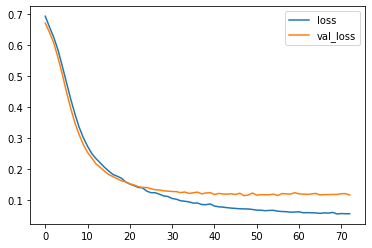

In [39]:
model_loss = pd.DataFrame(model.history.history)
model_loss.plot()

## Adding Dropout

In [ ]:
from tensorflow.keras.layers import Dropout

In [40]:
model = Sequential()

model.add(Dense(30, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(15, activation='relu'))
model.add(Dropout(0.5))

# Binary Classification
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy')

In [41]:
model.fit(x=X_train, y=y_train, epochs=600, validation_data=(X_test, y_test), callbacks=[early_stop])

Epoch 1/600
14/14 [==============================] - 1s 20ms/step - loss: 0.7161 - val_loss: 0.6977
Epoch 2/600
14/14 [==============================] - 0s 3ms/step - loss: 0.7151 - val_loss: 0.6818
Epoch 3/600
14/14 [==============================] - 0s 6ms/step - loss: 0.6858 - val_loss: 0.6705
Epoch 4/600
14/14 [==============================] - 0s 3ms/step - loss: 0.6788 - val_loss: 0.6625
Epoch 5/600
14/14 [==============================] - 0s 5ms/step - loss: 0.6558 - val_loss: 0.6531
Epoch 6/600
14/14 [==============================] - 0s 4ms/step - loss: 0.6495 - val_loss: 0.6369
Epoch 7/600
14/14 [==============================] - 0s 4ms/step - loss: 0.6251 - val_loss: 0.6149
Epoch 8/600
14/14 [==============================] - 0s 4ms/step - loss: 0.6261 - val_loss: 0.5915
Epoch 9/600
14/14 [==============================] - 1s 89ms/step - loss: 0.5971 - val_loss: 0.5643
Epoch 10/600
14/14 [==============================] - 0s 3ms/step - loss: 0.5824 - val_loss: 0.5317
Epoch 1

In [42]:
model_loss = pd.DataFrame(model.history.history)

<AxesSubplot:>

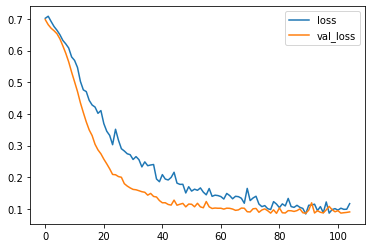

In [43]:
model_loss.plot()

## Model Evaluation

In [58]:
predictions = model.predict(X_test)
predictions = np.where(predictions > 0.5, 1,0)

In [59]:
from sklearn.metrics import classification_report, confusion_matrix

In [60]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97        55
           1       0.99      0.98      0.98        88

    accuracy                           0.98       143
   macro avg       0.98      0.98      0.98       143
weighted avg       0.98      0.98      0.98       143



In [61]:
print(confusion_matrix(y_test, predictions))

[[54  1]
 [ 2 86]]
